<a href="https://colab.research.google.com/github/ShabnamShaikh2614/House-Cost-Prediction/blob/main/HousecostPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **House Cost Prediction-** **Using linear Regression**


# Parameters


1.   longitude (From West)
2.   latitude (From North)
1.   House median age (how old house is )
2.   total number of room (No of room in building block)
1.   total bedrooms
2.   Population
1.   households(No of familys)
2.   median income (income of family in dollars)
1.   median house value (Target Variable- House cost)
2.   ocean proximity (How far from ocean)











# Steps to Train Model


1.   Prepared own data set using pandas and numby libraries
2.   created csv file name housing data.
1.   importing pandas & seaborn to deal with numerical values
2.   importing matplotlib for data visualization





In [ ]:
import pandas as pd
import numpy as np

# Define the column names
columns = [
    'longitude',
    'latitude',
    'house_median_age',
    'total_number_rooms',
    'total_bedrooms',
    'population',
    'households',
    'median_income',
    'median_house_value',
    'ocean_proximity'
]

#synthetic data for 200 rows
data = {}
data['longitude'] = np.random.uniform(low=-124.3, high=-114.3, size=200)
data['latitude'] = np.random.uniform(low=32.5, high=42.0, size=200)
data['house_median_age'] = np.random.randint(low=1, high=52, size=200)
data['total_number_rooms'] = np.random.randint(low=6, high=38000, size=200)
data['total_bedrooms'] = np.random.randint(low=2, high=6450, size=200)
data['population'] = np.random.randint(low=3, high=36000, size=200)
data['households'] = np.random.randint(low=2, high=6000, size=200)
data['median_income'] = np.random.uniform(low=0.5, high=15.0, size=200)
data['median_house_value'] = np.random.randint(low=15000, high=500001, size=200)
data['ocean_proximity'] = np.random.choice(['NEAR BAY', 'NOT NEAR BAY'], size=200)


# Creating the pandas DataFrame
df = pd.DataFrame(data, columns=columns)

# Display the first few rows of the DataFrame
display(df.head())

# Save the DataFrame to a CSV file
df.to_csv('housing.csv', index=False)

,longitude,latitude,house_median_age,total_number_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-117.717923,41.234697,37,13905,6039,26458,3724,8.591434,470307,NEAR BAY
1,-118.842792,38.441749,16,28706,2262,11854,4592,7.641275,482131,NOT NEAR BAY
2,-116.122817,38.756669,23,7887,5168,21794,389,8.480860,338696,NEAR BAY
3,-114.594522,33.814485,16,4366,2585,11847,2919,10.398036,151693,NOT NEAR BAY
4,-117.124562,36.517811,36,6147,5126,22682,3643,6.362581,442469,NOT NEAR BAY


In [ ]:
from google.colab import files
#downloading csv file
files.download('housing.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from ast import increment_lineno
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [ ]:
#Read data from csv file
housing_df=pd.read_csv('housing.csv')
#use .info() to show features
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           200 non-null    float64
 1   latitude            200 non-null    float64
 2   house_median_age    200 non-null    int64  
 3   total_number_rooms  200 non-null    int64  
 4   total_bedrooms      200 non-null    int64  
 5   population          200 non-null    int64  
 6   households          200 non-null    int64  
 7   median_income       200 non-null    float64
 8   median_house_value  200 non-null    int64  
 9   ocean_proximity     200 non-null    object 
dtypes: float64(3), int64(6), object(1)
memory usage: 15.8+ KB


# **Histogram**
# it is to visualize data how data is spread around the range & what are the outliers


Text(0.5, 0, 'House Values')

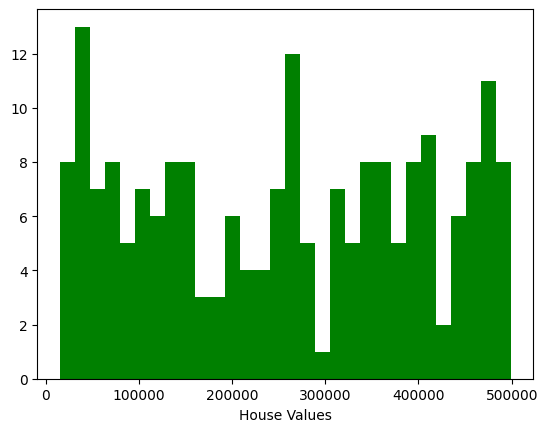

In [ ]:
#Plot distribution of target variable (median_hosing_value) using histogram
#bins - are the number of interval of data we want to make (no of data buckets)
plt.hist(housing_df['median_house_value'],bins=30, color='green')
plt.xlabel("House Values")
# most of the houses are around 100,0-800,000 range

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'house_median_age'}>],
       [<Axes: title={'center': 'total_number_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

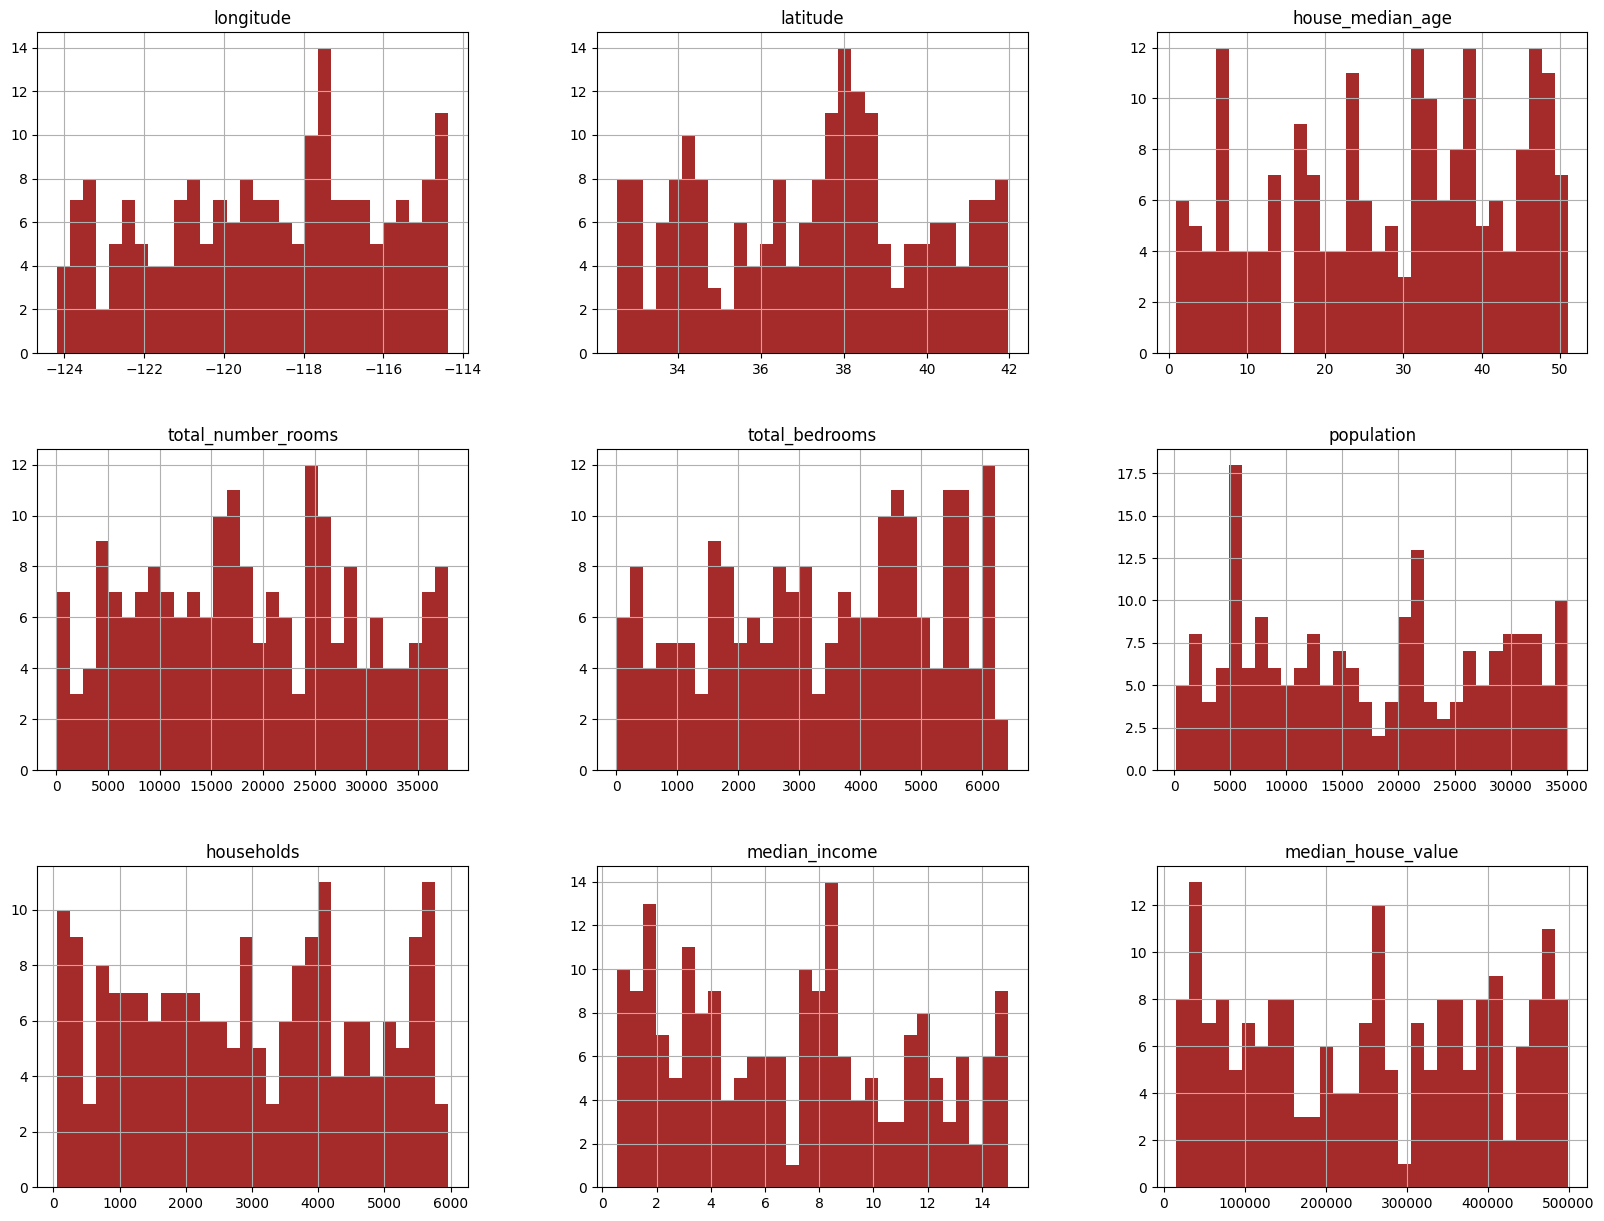

In [ ]:
#Ploting histogram for other features
housing_df.hist(bins=30, color='brown',figsize=(20,15))


# **Heatmap**
It is find relation within the parameters


In [ ]:
# Perform one-hot encoding on the 'ocean_proximity' column
housing_df_encoded = pd.get_dummies(housing_df, columns=['ocean_proximity'], drop_first=True)

# Display the first few rows of the new DataFrame
display(housing_df_encoded.head())

,longitude,latitude,house_median_age,total_number_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_NOT NEAR BAY
0,-117.717923,41.234697,37,13905,6039,26458,3724,8.591434,470307,False
1,-118.842792,38.441749,16,28706,2262,11854,4592,7.641275,482131,True
2,-116.122817,38.756669,23,7887,5168,21794,389,8.480860,338696,False
3,-114.594522,33.814485,16,4366,2585,11847,2919,10.398036,151693,True
4,-117.124562,36.517811,36,6147,5126,22682,3643,6.362581,442469,True


In [ ]:
# Drop the 'ocean_proximity' column from the DataFrame
housing_df_dropped = housing_df.drop('ocean_proximity', axis=1)

# Display the first few rows of the new DataFrame
display(housing_df_dropped.head())

,longitude,latitude,house_median_age,total_number_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-117.717923,41.234697,37,13905,6039,26458,3724,8.591434,470307
1,-118.842792,38.441749,16,28706,2262,11854,4592,7.641275,482131
2,-116.122817,38.756669,23,7887,5168,21794,389,8.480860,338696
3,-114.594522,33.814485,16,4366,2585,11847,2919,10.398036,151693
4,-117.124562,36.517811,36,6147,5126,22682,3643,6.362581,442469


In [ ]:
#plot the corelation for each column in the dataset
corr=housing_df_dropped.corr()
print(corr)

                    longitude  latitude  house_median_age  total_number_rooms  \
longitude            1.000000  0.098806         -0.065706            0.034974   
latitude             0.098806  1.000000          0.129861           -0.074443   
house_median_age    -0.065706  0.129861          1.000000           -0.064973   
total_number_rooms   0.034974 -0.074443         -0.064973            1.000000   
total_bedrooms       0.017173 -0.132314         -0.036762            0.024712   
population           0.128951  0.039257         -0.049313           -0.066376   
households           0.017042 -0.129955          0.052475            0.093202   
median_income       -0.084830 -0.074607         -0.019503            0.011610   
median_house_value   0.038667  0.125745         -0.049615           -0.011756   

                    total_bedrooms  population  households  median_income  \
longitude                 0.017173    0.128951    0.017042      -0.084830   
latitude                 -0.132314 

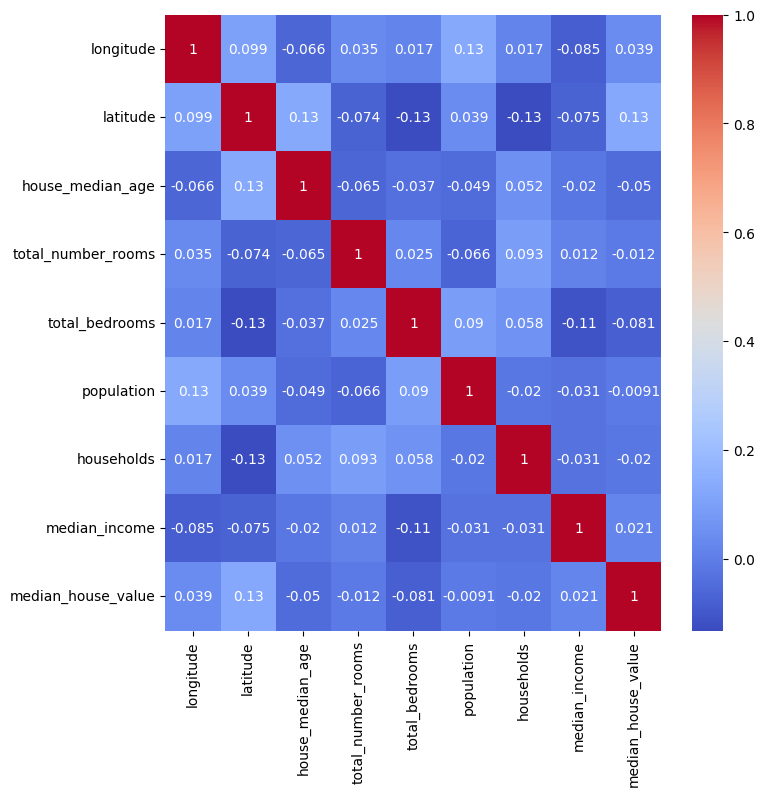

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

**Reasoning**:
Import the LinearRegression model and train it using the training data.



In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Evaluate model

### Subtask:
Assess the performance of your trained model using metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), or R-squared on the testing data.


**Reasoning**:
Calculate MAE, MSE, and R-squared to assess the model's performance on the test set.



In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Absolute Error (MAE): 132680.18352237187
Mean Squared Error (MSE): 23151544669.352184
R-squared (R2 ): -0.11981169009812032


## Make predictions

### Subtask:
Use the trained model to make predictions on new data.


**Reasoning**:
Use the trained linear regression model to make predictions on the test set and display the first few predictions.



In [ ]:
y_predictions = model.predict(X_test)
display(y_predictions[:5])

array([239349.67589204, 257635.75830038, 266282.73790525, 267491.44985147,
       289515.3832277 ])